# "파이썬에서 그래프 그리기"


- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Python]
- image: images/if_logo.png

In [37]:
import matplotlib.pyplot as plt
import numpy as np

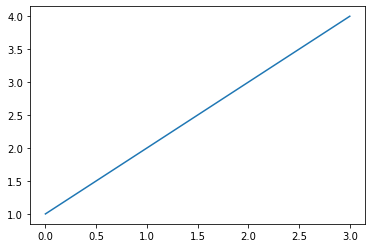

In [38]:
plt.plot([1, 2, 3, 4])

In [39]:
plt.show()

# 정규분포 그래프

$f(x) = \cfrac{1}{\sqrt{2\pi}\sigma}e^{-\cfrac{(x-\mu)^2}{2\sigma^2}}$

$f(x) = \cfrac{1}{\sqrt{2\pi}}e^{-\cfrac{x^2}{2}}$

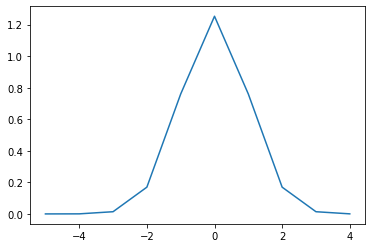

In [63]:
def st_normar_distribution(x):
    f = np.sqrt(1/2*np.pi)*(np.exp(-(x**2)/2))
    return f
    
    
x = range(-5, 5)
y = [st_normar_distribution(x) for x in x]
plt.plot(x, y)

In [60]:
?np.linspace

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [ ]:
x = np.lins(-5, 5)
y = [st_normar_distribution(x) for x in x]
plt.plot(x, y)